## Step 1: Install Prerequisites Libraries for the Runtime

In [1]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 591 kB 5.2 MB/s 
     |████████████████████████████████| 103 kB 49.1 MB/s 
     |████████████████████████████████| 6.3 MB 25.5 MB/s 
     |████████████████████████████████| 1.1 MB 40.9 MB/s 
     |████████████████████████████████| 1.1 MB 37.2 MB/s 
     |████████████████████████████████| 636 kB 44.3 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 840 kB 42.4 MB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
     |████████████████████████████████| 1.2 MB 39.2 MB/s 
     |████████████████████████████████| 211 kB 48.2 MB/s 
     |████████████████████████████████| 120 kB 46.9 MB/s 
     |████████████████████████████████| 37.1 MB 46 kB/s 
     |████████████████████████████████| 352 kB 47.0 MB/s 
     |████████████████████████████████| 99 kB 8.4 MB/s 
     |████████████████████████████████| 200 kB 46.0 MB/s 


## Step 2: Import required libraries

In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

## Mount drive to Google Drive and unzip the images. Set file path

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# !unzip /content/drive/MyDrive/dataset.zip -d /content/drive/MyDrive/dataset

In [5]:
image_path = '/content/drive/MyDrive/dataset/dataset'

## Split the dataset into training data and testing data

In [6]:
data = DataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 400, num_label: 4, labels: Clean, Dirty, Empty, Wet.


##  Customize the EfficientNet model

In [7]:
efficient_model = image_classifier.create(train_data, batch_size=16, epochs=10, validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
20/20 [==============================] - 118s 4s/step - loss: 0.8866 - accuracy: 0.7219 - val_loss: 0.5113 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 59s 3s/step - loss: 0.4603 - accuracy: 0.9969 - val_loss: 0.4203 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 62s 3s/step - loss: 0.3971 - accuracy: 1.0000 - val_loss: 0.3721 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 53s 3s/step - loss: 0.3818 - accuracy: 1.0000 - val_loss: 0.3650 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 55s 3s/step - loss: 0.3772 - accuracy: 1.0000 - val_loss: 0.3627 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 56s 3s/step - loss: 0.3764 - accuracy: 1.0000 - val_loss: 0.3627 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 56s 3s/step - loss: 0.3771 - accuracy: 1.0000 - val_loss: 0.3602 - val_accuracy: 1.0000
Epoch 8/10
20/20 [=

In [8]:
efficient_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________


## Evaluate the EfficientNet model

In [9]:
loss, accuracy = efficient_model.evaluate(test_data)

2/2 [==============================] - 23s 759ms/step - loss: 0.3574 - accuracy: 1.0000


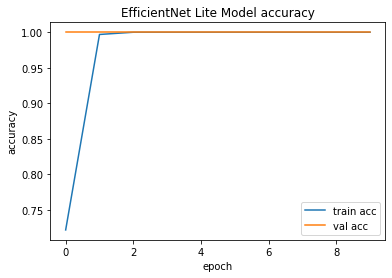

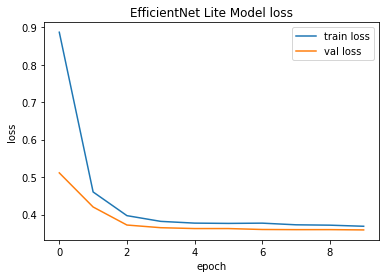

In [10]:
# Plot the train and validation accuracies
plt.title('EfficientNet Lite Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(efficient_model.history.history['accuracy'], label='train acc')
plt.plot(efficient_model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Plot the train and validation loss
plt.title('EfficientNet Lite Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(efficient_model.history.history['loss'], label='train loss')
plt.plot(efficient_model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

## Export the EfficientNet model

In [11]:
efficient_model.export(export_dir='.', tflite_filename='efficientnet_lite0.tflite')

INFO:tensorflow:Assets written to: /tmp/tmp2jzt56xj/assets


INFO:tensorflow:Assets written to: /tmp/tmp2jzt56xj/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpnzymghen/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpnzymghen/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./efficientnet_lite0.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./efficientnet_lite0.tflite


##  Customize the MobileNet model

In [12]:
mobilenet_model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data, batch_size=16, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


20/20 [==============================] - 68s 3s/step - loss: 0.7096 - accuracy: 0.8219 - val_loss: 0.4945 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 59s 3s/step - loss: 0.4549 - accuracy: 0.9875 - val_loss: 0.4037 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 61s 3s/step - loss: 0.4060 - accuracy: 1.0000 - val_loss: 0.3770 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 53s 3s/step - loss: 0.3921 - accuracy: 1.0000 - val_loss: 0.3677 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 53s 3s/step - loss: 0.3871 - accuracy: 1.0000 - val_loss: 0.3686 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 54s 3s/step - loss: 0.3826 - accuracy: 1.0000 - val_loss: 0.3645 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 55s 3s/step - loss: 0.3778 - accuracy: 1.0000 - val_loss: 0.3631 - val_accuracy: 1.0000
Epoch 8/10
20/20 [=============

In [13]:
mobilenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


## Evaluate the MobileNet model

In [14]:
loss, accuracy = mobilenet_model.evaluate(test_data)

2/2 [==============================] - 18s 268ms/step - loss: 0.3644 - accuracy: 1.0000


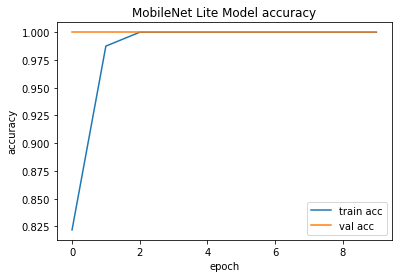

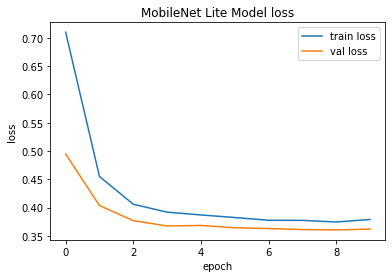

In [15]:
# Plot the train and validation accuracies
plt.title('MobileNet Lite Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(mobilenet_model.history.history['accuracy'], label='train acc')
plt.plot(mobilenet_model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Plot the train and validation loss
plt.title('MobileNet Lite Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(mobilenet_model.history.history['loss'], label='train loss')
plt.plot(mobilenet_model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

## Export the MobileNet model

In [16]:
mobilenet_model.export(export_dir='.', tflite_filename='mobilenet_v2.tflite')

INFO:tensorflow:Assets written to: /tmp/tmpb_cabgtc/assets


INFO:tensorflow:Assets written to: /tmp/tmpb_cabgtc/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpmp2c0fqe/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpmp2c0fqe/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./mobilenet_v2.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./mobilenet_v2.tflite
